In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from report_config import ReportConfig
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
reviews_df = pd.read_csv("./glassdoor_reviews_predicted.csv")

In [52]:
reviews_df.head()

,review_id,company,employee_role,employee_detail,review_text,review_date,star_rating,sentiment,annotated,predicted_sentiment,sentiment_label
0,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano","Companheirismo entre os colegas, oportunidade ...",2023-12-15,5.0,1,0,1,Positivo
1,82630669,Tecnomapas,Recepcionista,"Ex-funcionário(a), mais de um ano",Não tive nenhum ponto negativo,2023-12-15,5.0,0,1,0,Neutro
2,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Equipe bem prestativa e ótima de se trabalhar.,2023-03-11,4.0,1,0,1,Positivo
3,74420027,Tecnomapas,Analista Desenvolvedor,Ex-freelancer,Modo home office ainda tem que ser melhorado.,2023-03-11,4.0,2,0,2,Negativo
4,60212043,Tecnomapas,Funcionário confidencial,"Ex-funcionário(a), menos de um ano",Única vantagem era o trabalho ser home office,2022-02-24,1.0,0,1,0,Neutro


In [11]:
def count_ngrams(review_text, ngrams=3):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(review_text)
    bag_of_words = vec.transform(review_text)
    sum_words = bag_of_words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    top_n_grams = words_freq[:10]
    x, y = map(list, zip(*top_n_grams))
    return x, y

c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\venvs\venv_sent_analysis\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


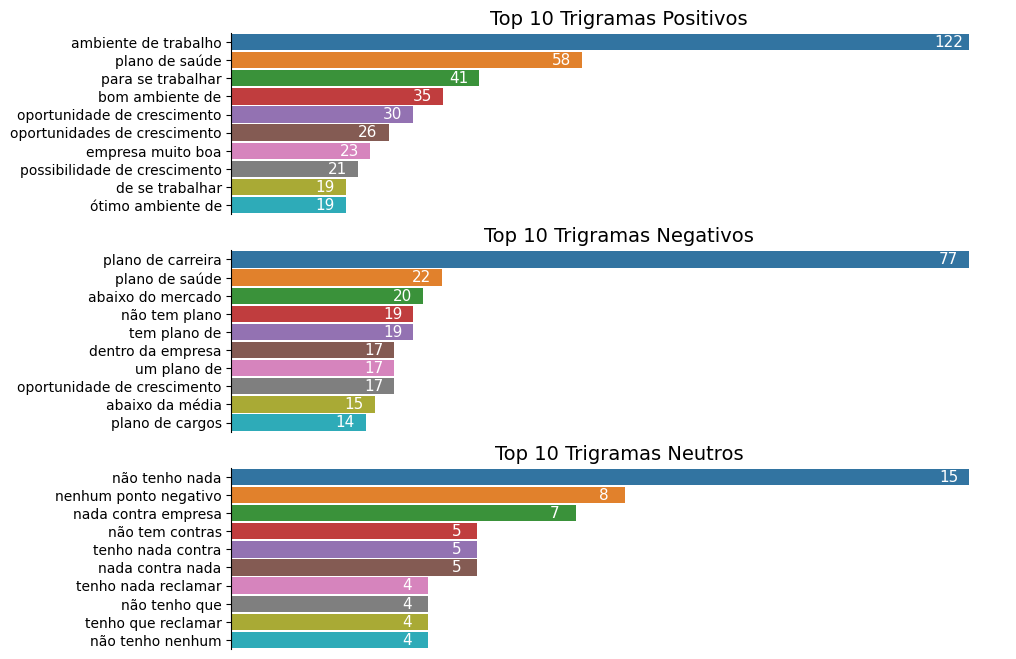

In [51]:
neutral_reviews_df = reviews_df.loc[
    reviews_df["predicted_sentiment"] == 0, ["review_text"]
]
neutral_reviews_df.reset_index(drop=True, inplace=True)
neutral_reviews_text = neutral_reviews_df["review_text"]
x_neutral, y_neutral = count_ngrams(neutral_reviews_text)

positive_reviews_df = reviews_df.loc[
    reviews_df["predicted_sentiment"] == 1, ["review_text"]
]
positive_reviews_df.reset_index(drop=True, inplace=True)
positive_reviews_text = positive_reviews_df["review_text"]
x_positive, y_positive = count_ngrams(positive_reviews_text)

negative_reviews_df = reviews_df.loc[
    reviews_df["predicted_sentiment"] == 2, ["review_text"]
]
negative_reviews_df.reset_index(drop=True, inplace=True)
negative_reviews_text = negative_reviews_df["review_text"]
x_negative, y_negative = count_ngrams(negative_reviews_text)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

sns.barplot(
    x=y_positive,
    y=x_positive,
    ax=ax[0],
    width=0.9,
    orient="h",
)

sns.barplot(
    x=y_negative,
    y=x_negative,
    ax=ax[1],
    width=0.9,
    orient="h",
)

sns.barplot(
    x=y_neutral,
    y=x_neutral,
    ax=ax[2],
    width=0.9,
    orient="h",
)

# Annotates
for p in ax[0].patches:
    ax[0].annotate(
        text=f"{p.get_width():.0f}",
        xy=(p.get_width(), (p.get_y() + p.get_height() / 2)),
        ha="center",
        va="center",
        fontsize=11,
        color="white",
        xytext=(-15, 0),
        textcoords="offset points",
    )

for p in ax[1].patches:
    ax[1].annotate(
        text=f"{p.get_width():.0f}",
        xy=(p.get_width(), (p.get_y() + p.get_height() / 2)),
        ha="center",
        va="center",
        fontsize=11,
        color="white",
        xytext=(-15, 0),
        textcoords="offset points",
    )

for p in ax[2].patches:
    ax[2].annotate(
        text=f"{p.get_width():.0f}",
        xy=(p.get_width(), (p.get_y() + p.get_height() / 2)),
        ha="center",
        va="center",
        fontsize=11,
        color="white",
        xytext=(-15, 0),
        textcoords="offset points",
    )

# # Axes config
ax[0].set_xlabel("")
ax[0].set_xticks([])

ax[0].set_ylabel("")

ax[0].set_title(
    "Top 10 Trigramas Positivos",
    fontsize=ReportConfig.CHART_TITLE_FONT_SIZE,
    y=1.0,
)

ax[0].spines["top"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)

ax[1].set_xlabel("")
ax[1].set_xticks([])

ax[1].set_ylabel("")

ax[1].set_title(
    "Top 10 Trigramas Negativos",
    fontsize=ReportConfig.CHART_TITLE_FONT_SIZE,
    y=1.0,
)

ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)

ax[2].set_xlabel("")
ax[2].set_xticks([])

ax[2].set_ylabel("")

ax[2].set_title(
    "Top 10 Trigramas Neutros",
    fontsize=ReportConfig.CHART_TITLE_FONT_SIZE,
    y=1.0,
)

ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
ax[2].spines["bottom"].set_visible(False)

plt.savefig(
    "top_10_trigrams.png",
    transparent=True,
    dpi=300,
    bbox_inches="tight",
)

plt.show()

In [54]:
reviews_df.loc[reviews_df["review_text"].str.contains("abaixo do mercado"), ["company", "review_text", "sentiment_label"]]

,company,review_text,sentiment_label
81,Abaco Tecnologia de Informação Ltda,"Salário abaixo do mercado, nenhuma preocupação...",Negativo
215,Agenda Assessoria,Faixa salário abaixo do mercado de trabalho,Negativo
305,Amaggi,Salário bem abaixo do mercado. Difícil crescim...,Negativo
357,Amaggi,"Disparidade salarial, PPR abaixo do mercado, p...",Negativo
479,Amaggi,Salário abaixo do mercado no Agro.,Negativo
489,Amaggi,Só dão oportunidade de crescimento se a pessoa...,Negativo
511,Amaggi,"salário abaixo do mercado, oportunidade",Negativo
1217,Cigam Software Corporativo,media salarial abaixo do mercado,Negativo
1279,Cigam Software Corporativo,Salário abaixo do mercado. Demora na oferta de...,Negativo
1285,Cigam Software Corporativo,Empresa promove um discursso mas não o pratica...,Negativo
